In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [66]:
laptop = pd.read_csv("final_dataset.csv")

### Exploratory Data Analysis

In [ ]:
laptop.info()

In [ ]:
laptop.describe()
# laptop.isnull().sum()

In [ ]:
# Specify specific columns for which you want to print value counts
columns_to_check = [ 'brand', 'model', 'processor', 'storage capacity', 'ram memory', 'display size', 'cpu cores'] 

# Iterate through specified columns and print value counts
for column in columns_to_check:
    print("Column:", column)
    print(laptop[column].nunique())
    print()

### Basic Visualization

In [67]:
attributes = list(laptop.columns)
excluded_cols = ['brand', 'model', 'name', 'id', 'url', 'image', 'instock']
numeric_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'price', 'id', 'url', 'image', 'instock']
count_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'id', 'url', 'image', 'instock']
pair_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'brand', 'rating', 'reviews', 'id', 'url', 'image', 'instock']
brand_cols = [col for col in attributes if col not in excluded_cols]

In [ ]:
cols = list(laptop.columns)

# Remove the specified columns
excluded_cols = ['id', 'brand', 'model', 'rating', 'reviews', 'name', 'url', 'image', 'instock']
cols = [col for col in cols if col not in excluded_cols]

In [ ]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(len(cols) / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, col in enumerate(cols):
    sns.histplot(data=laptop, x=col, bins=20, color='skyblue', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Loop through each column and create a box plot
for col in cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(data=laptop, x=col, color='skyblue')
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.xlabel('')  # No need for x label as it's a single variable plot
    plt.ylabel(col.capitalize())
    plt.show()
    print("Column:", col)
    print(laptop[col].value_counts())
    print()


### Bivariate Visualization

In [ ]:
# List of columns to plot against 'price'
cols_to_plot = ['processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card']

# Loop through each column and create a scatter plot with 'price'
for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=laptop, x=col, y='price')
    plt.title(f'Scatter Plot of Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.show()

In [ ]:
# Heatmap
# Create a DataFrame with only the numerical columns
numerical_data = laptop[cols]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

### 1. What do best brands  offer?
- If you are buying from Daraz, you should consider brands DEll, Lenova, Acer, Asus, MSI and Apple(debatable) because since they have more number present than others, they are reliable.
- Therefore, we considered the **Top Brands**:
    - Acer, 
    - Asus, 
    - Lenovo, 
    - Dell, 
    - Apple, 
    - MSI


C:\Users\acer\AppData\Local\Temp\ipykernel_9972\3256990578.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


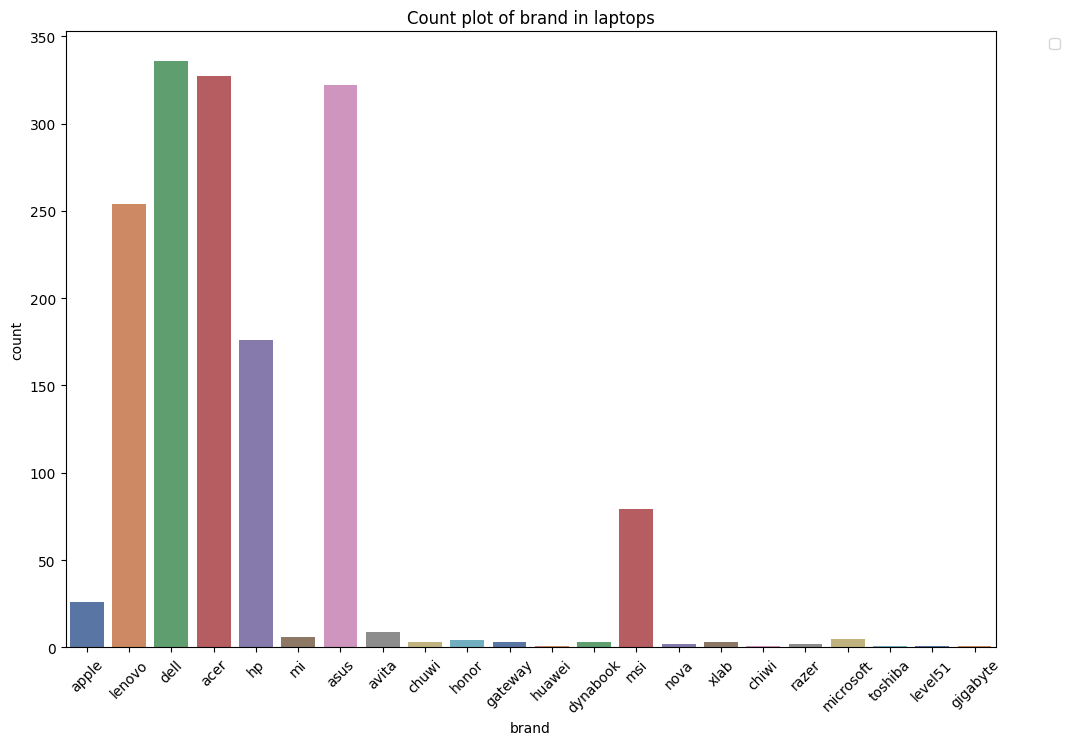

In [68]:
col='brand'
plt.figure(figsize=(12,8))
sns.countplot(data=laptop, x=col, hue=col, palette='deep')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f"Count plot of {col} in laptops")
plt.show()

##### Brandwise Average Analysis

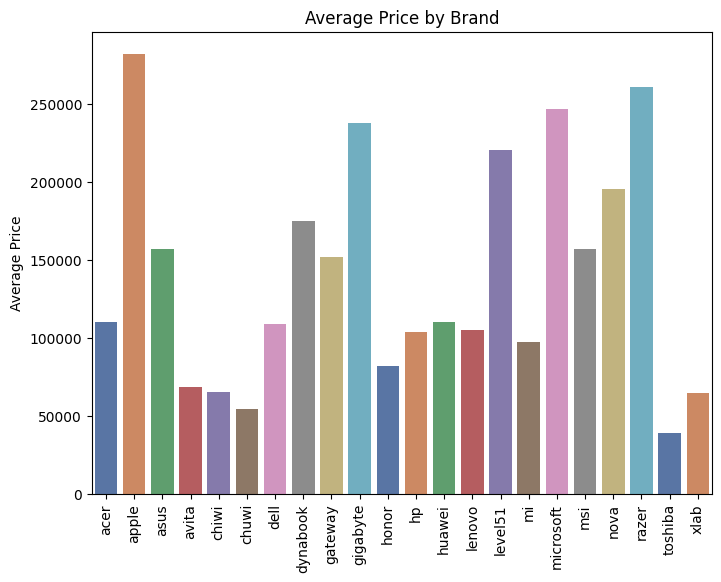

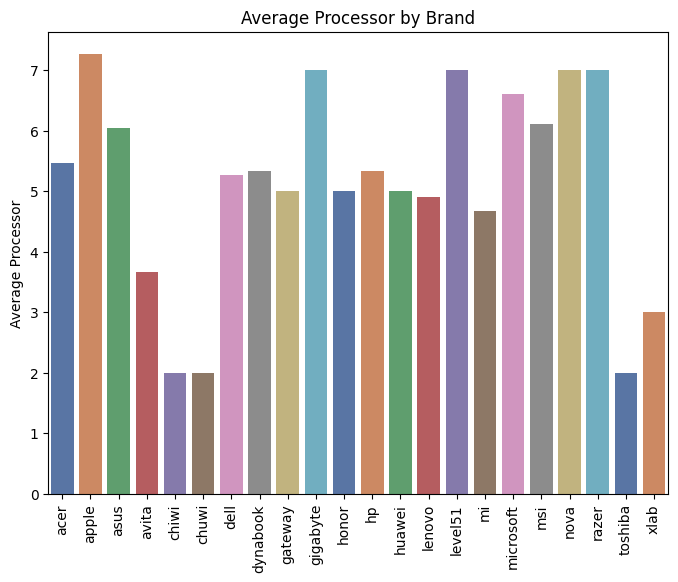

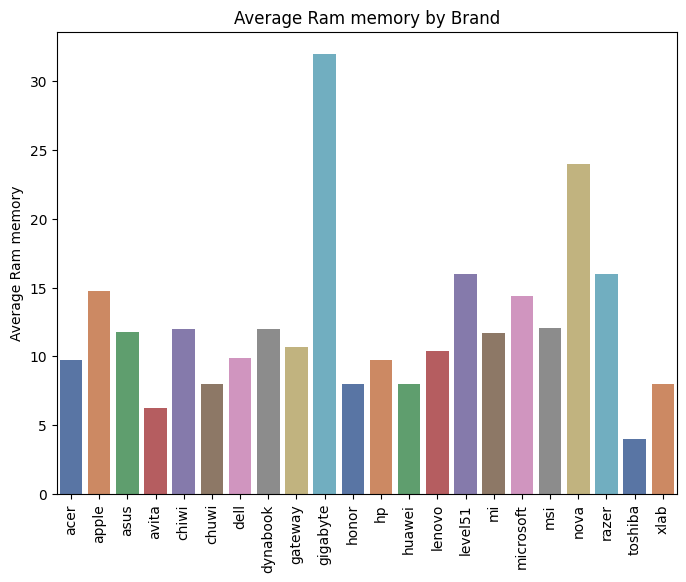

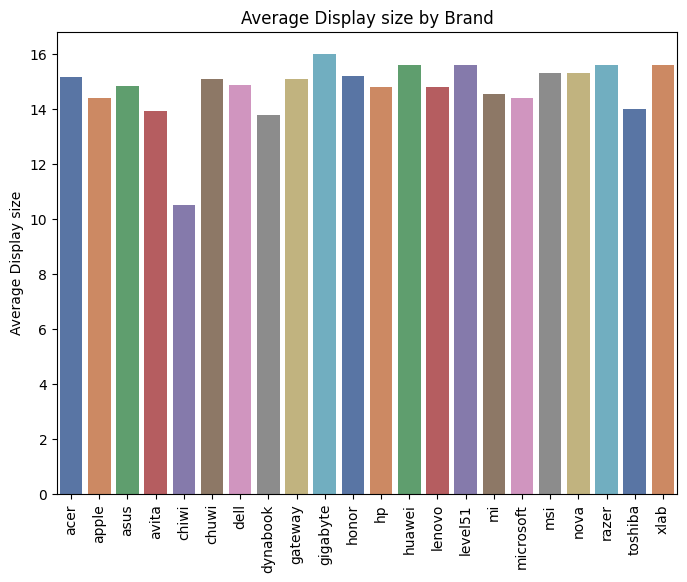

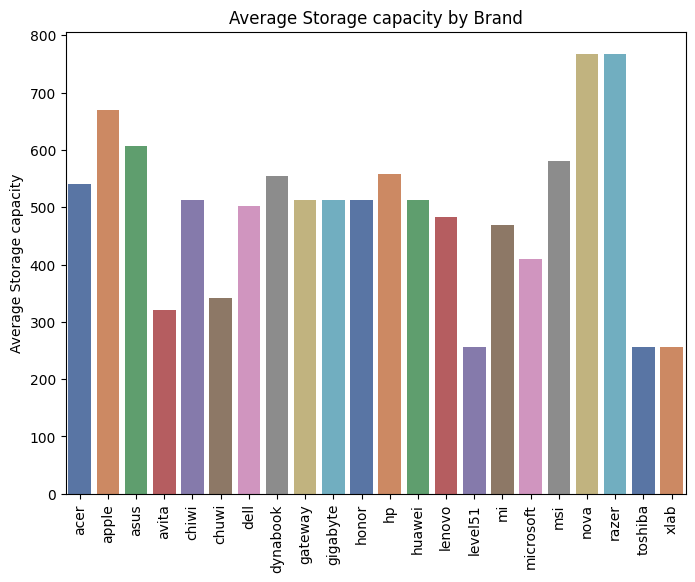

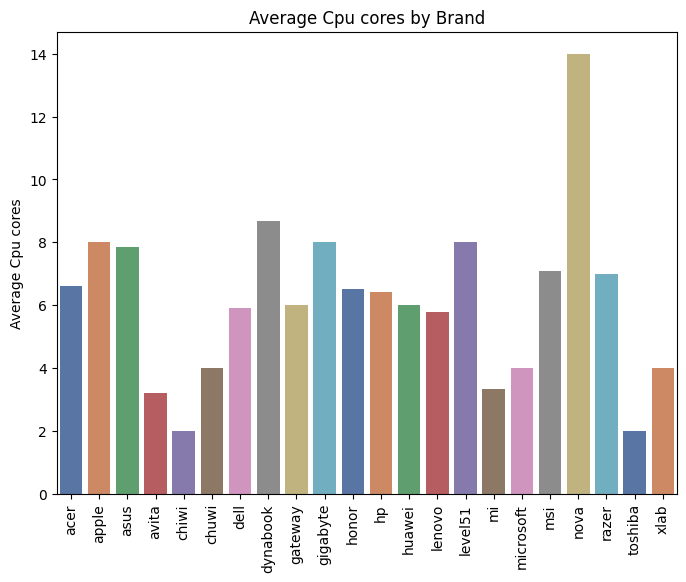

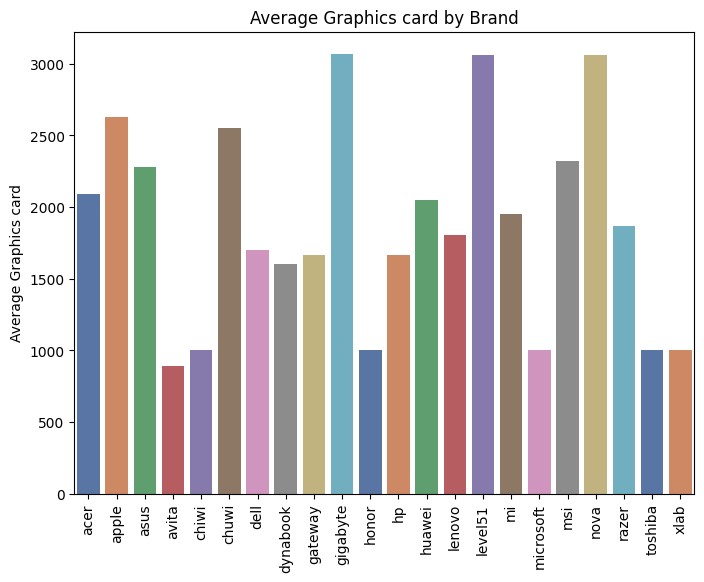

In [69]:
brand_analysis = laptop.groupby('brand').agg({
    'price': 'mean',
    'rating': 'mean',
    'processor': 'mean',
    'ram memory': 'mean',
    'display size': 'mean',
    'storage capacity': 'mean',
    'cpu cores': 'mean',
    'graphics card': 'mean'
}).reset_index()


for i, col in enumerate(brand_cols, 1):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=brand_analysis, x='brand', y=col, hue='brand', palette='deep')
    plt.xticks(rotation=90)
    plt.title(f'Average {col.capitalize()} by Brand')
    plt.xlabel('')
    plt.ylabel(f'Average {col.capitalize()}')
    plt.show()

##### Histograms of Price, Processor, Ram, Storage, CpuCores, and DisplaySize with **Top Brands**

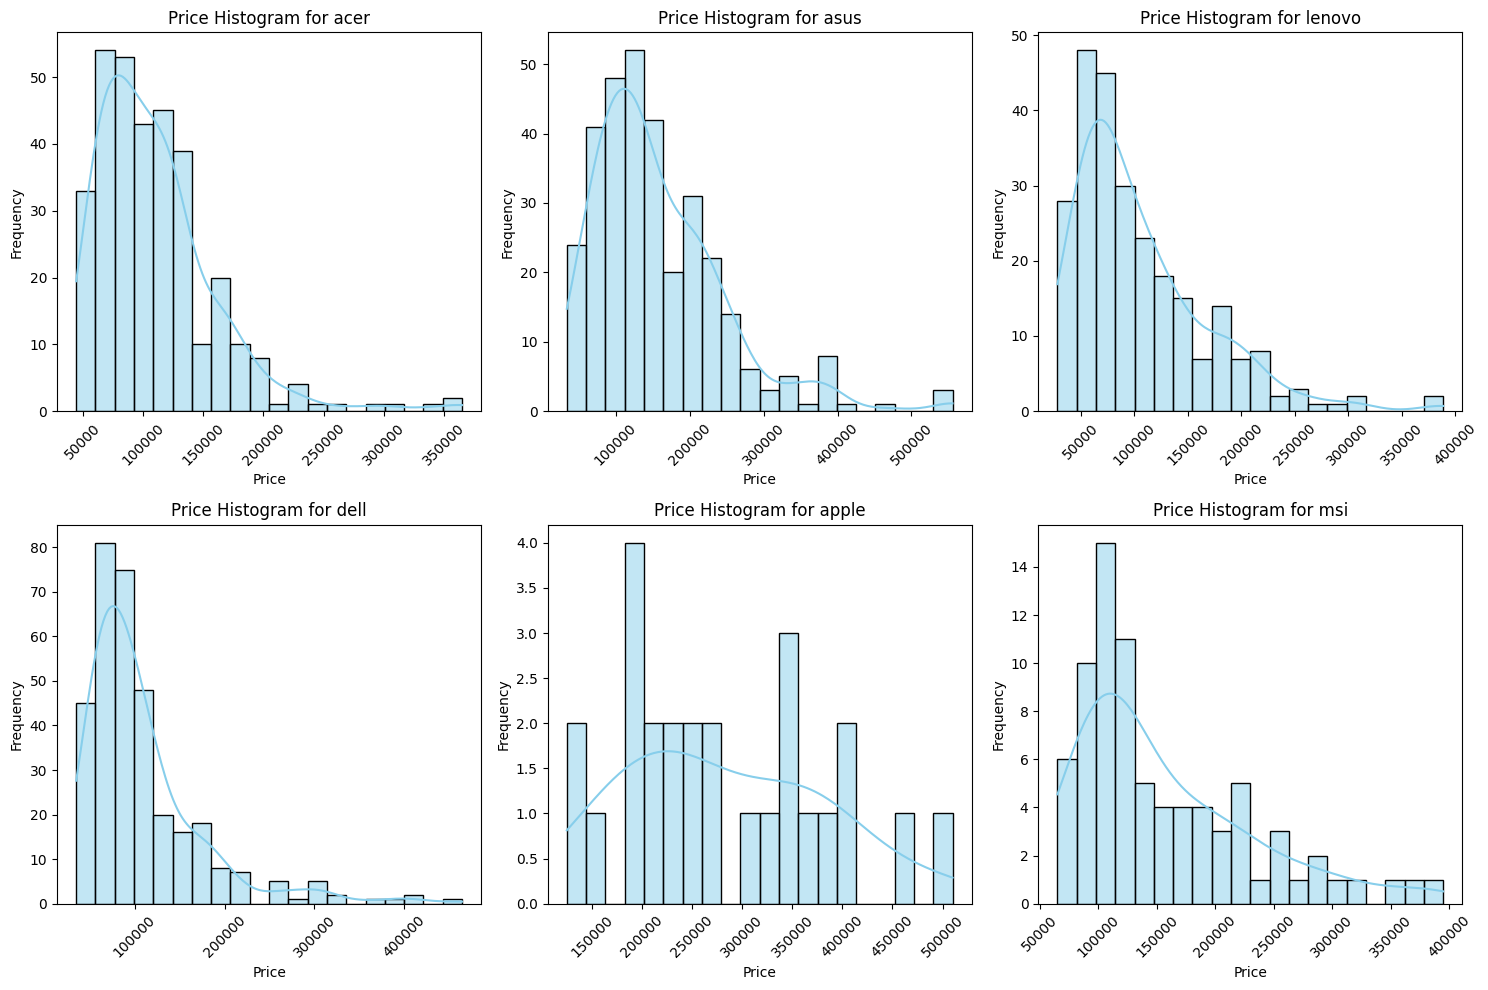

In [78]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']

num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='price', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Price Histogram for {brand}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

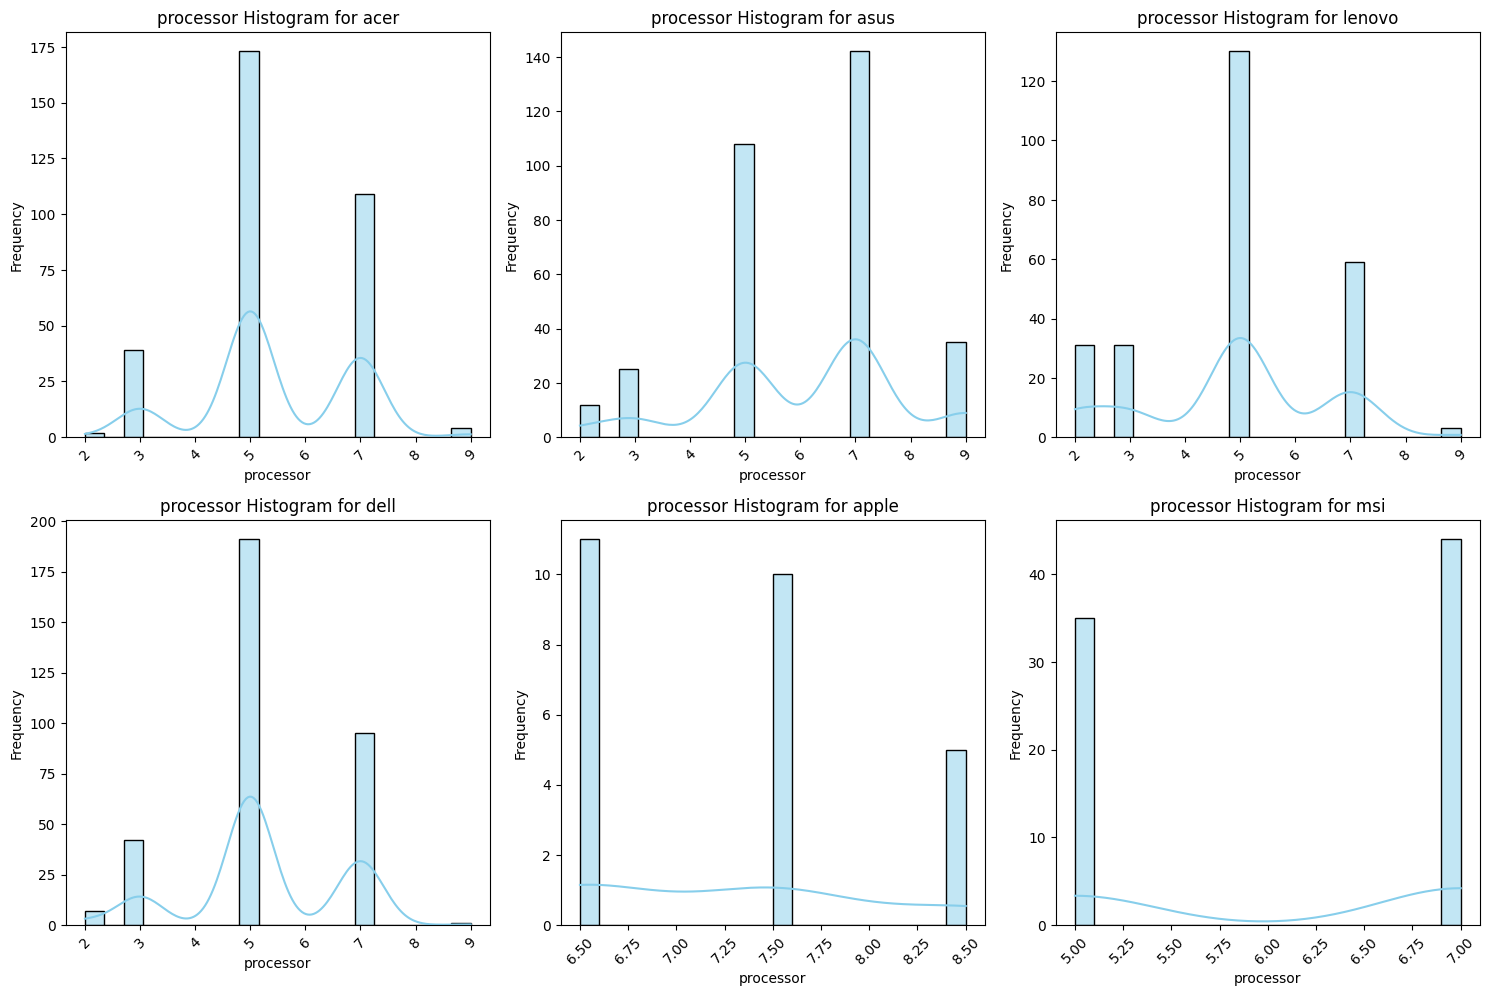

In [80]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']

num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='processor', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Processor Histogram for {brand}')
    axes[i].set_xlabel('Processor')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

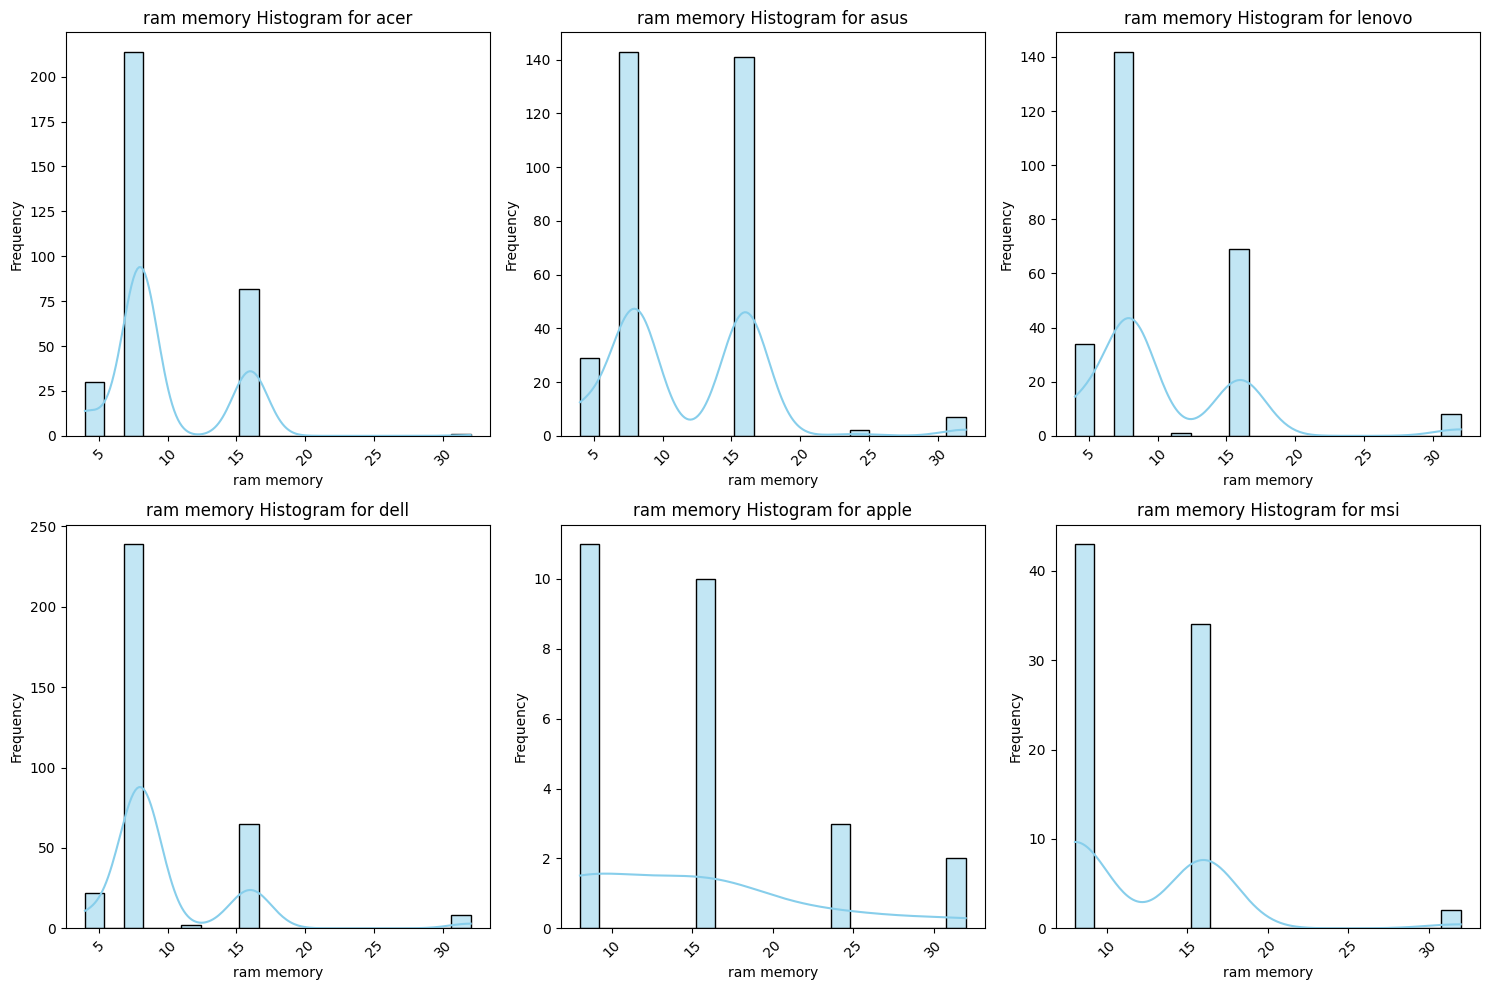

In [81]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']

num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  # Ceiling division

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='ram memory', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Ram memory Histogram for {brand}')
    axes[i].set_xlabel('Ram memory')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

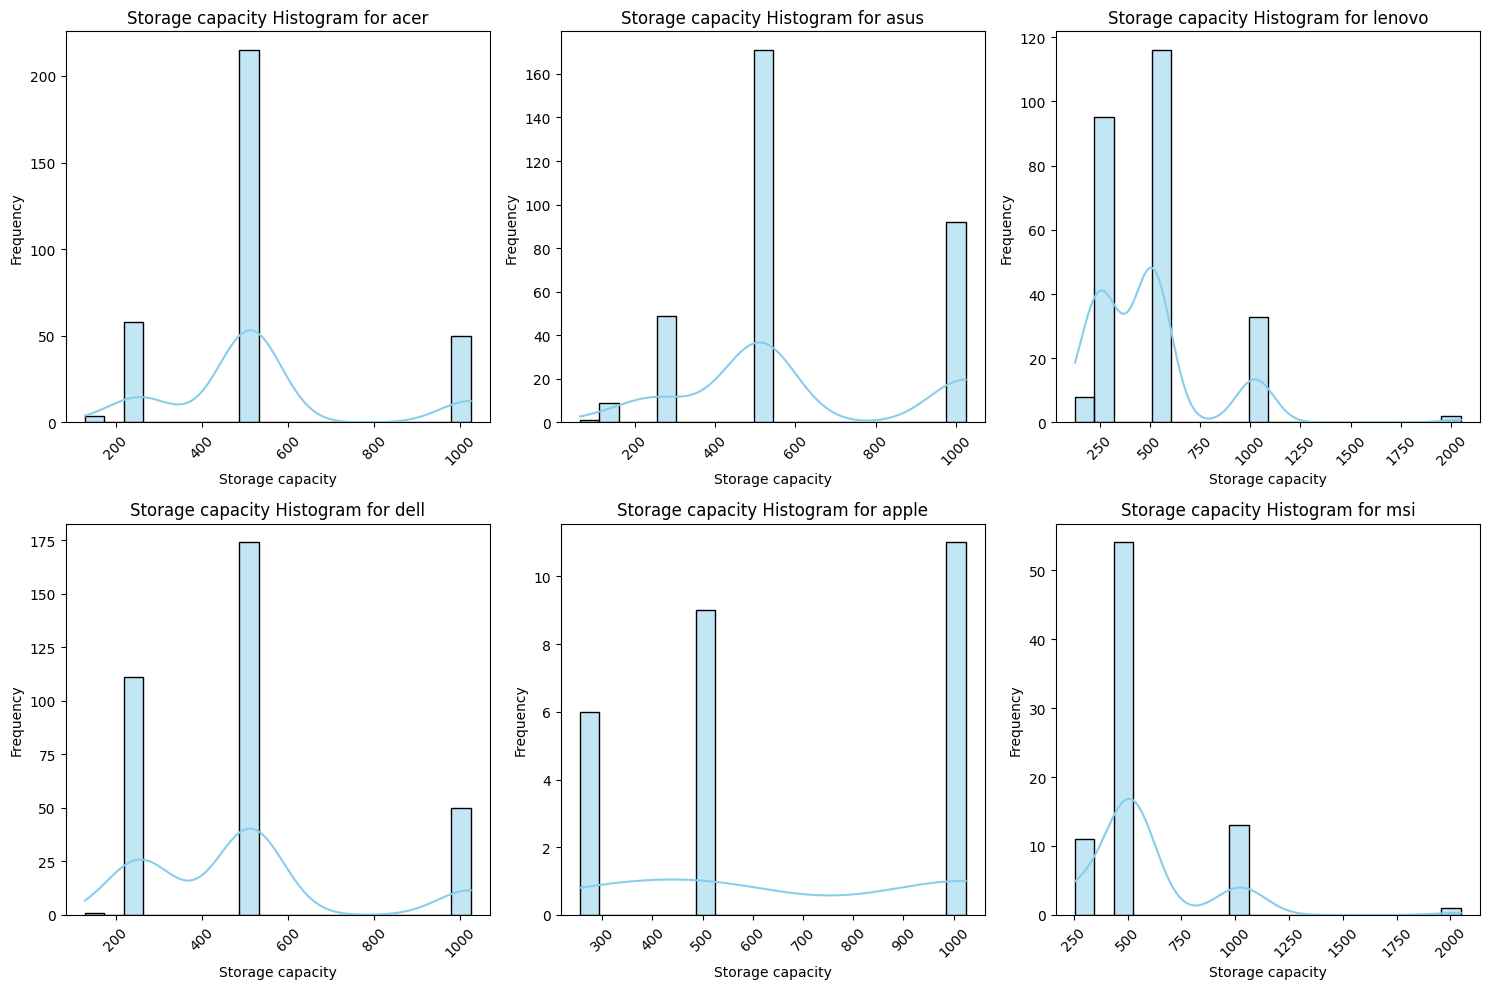

In [82]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']


num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='storage capacity', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Storage capacity Histogram for {brand}')
    axes[i].set_xlabel('Storage capacity')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

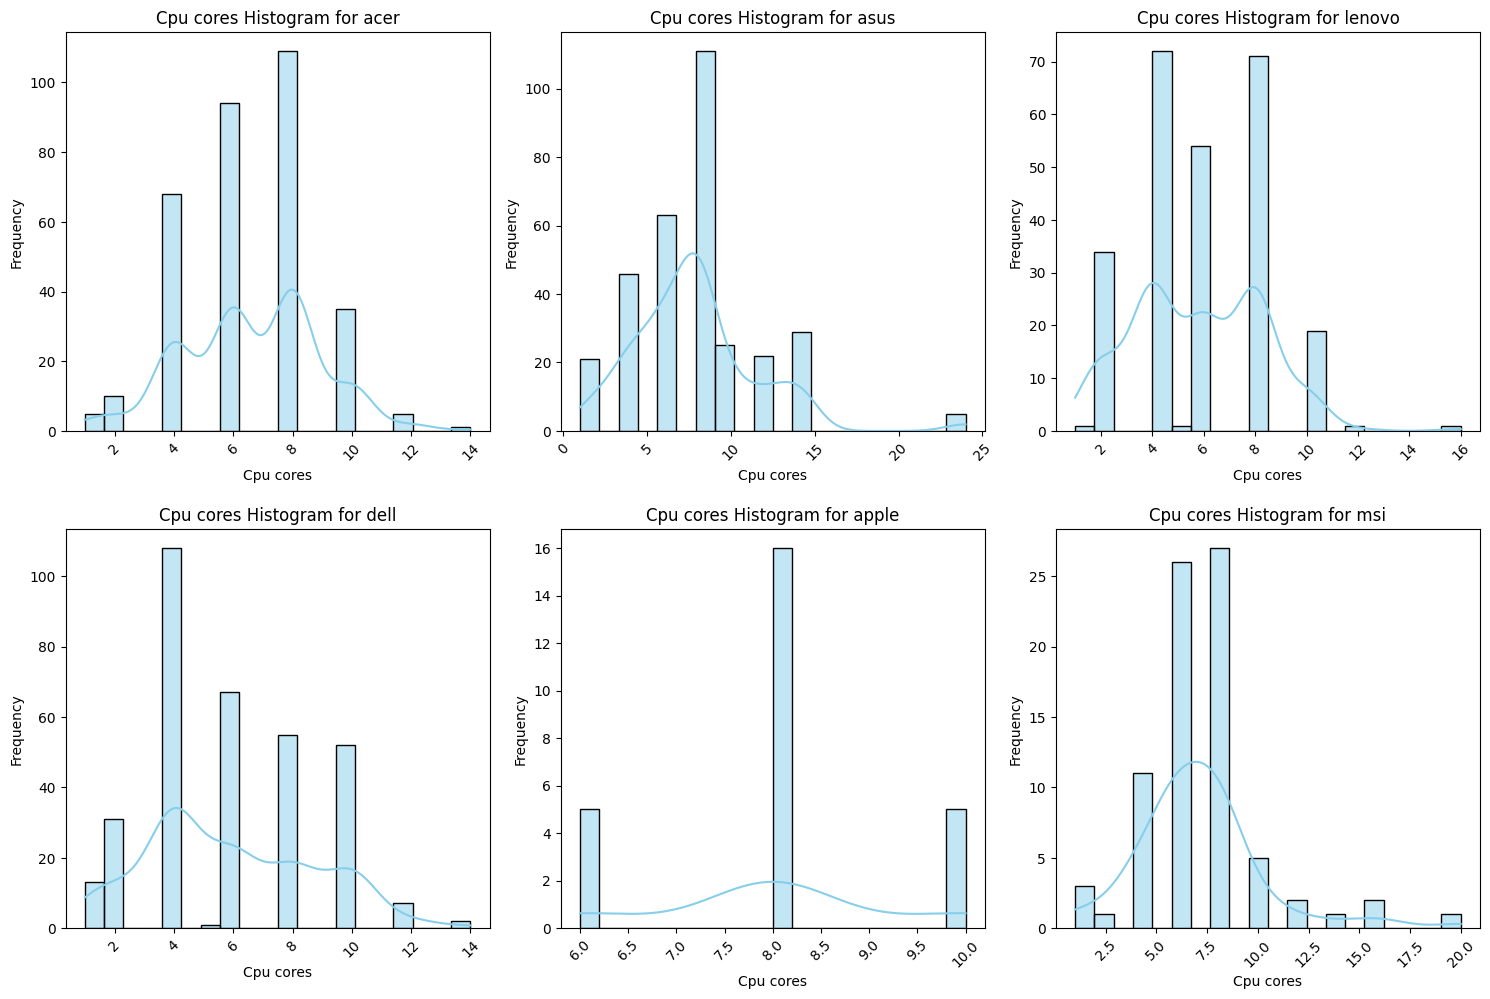

In [83]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']


num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='cpu cores', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Cpu cores Histogram for {brand}')
    axes[i].set_xlabel('Cpu cores')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

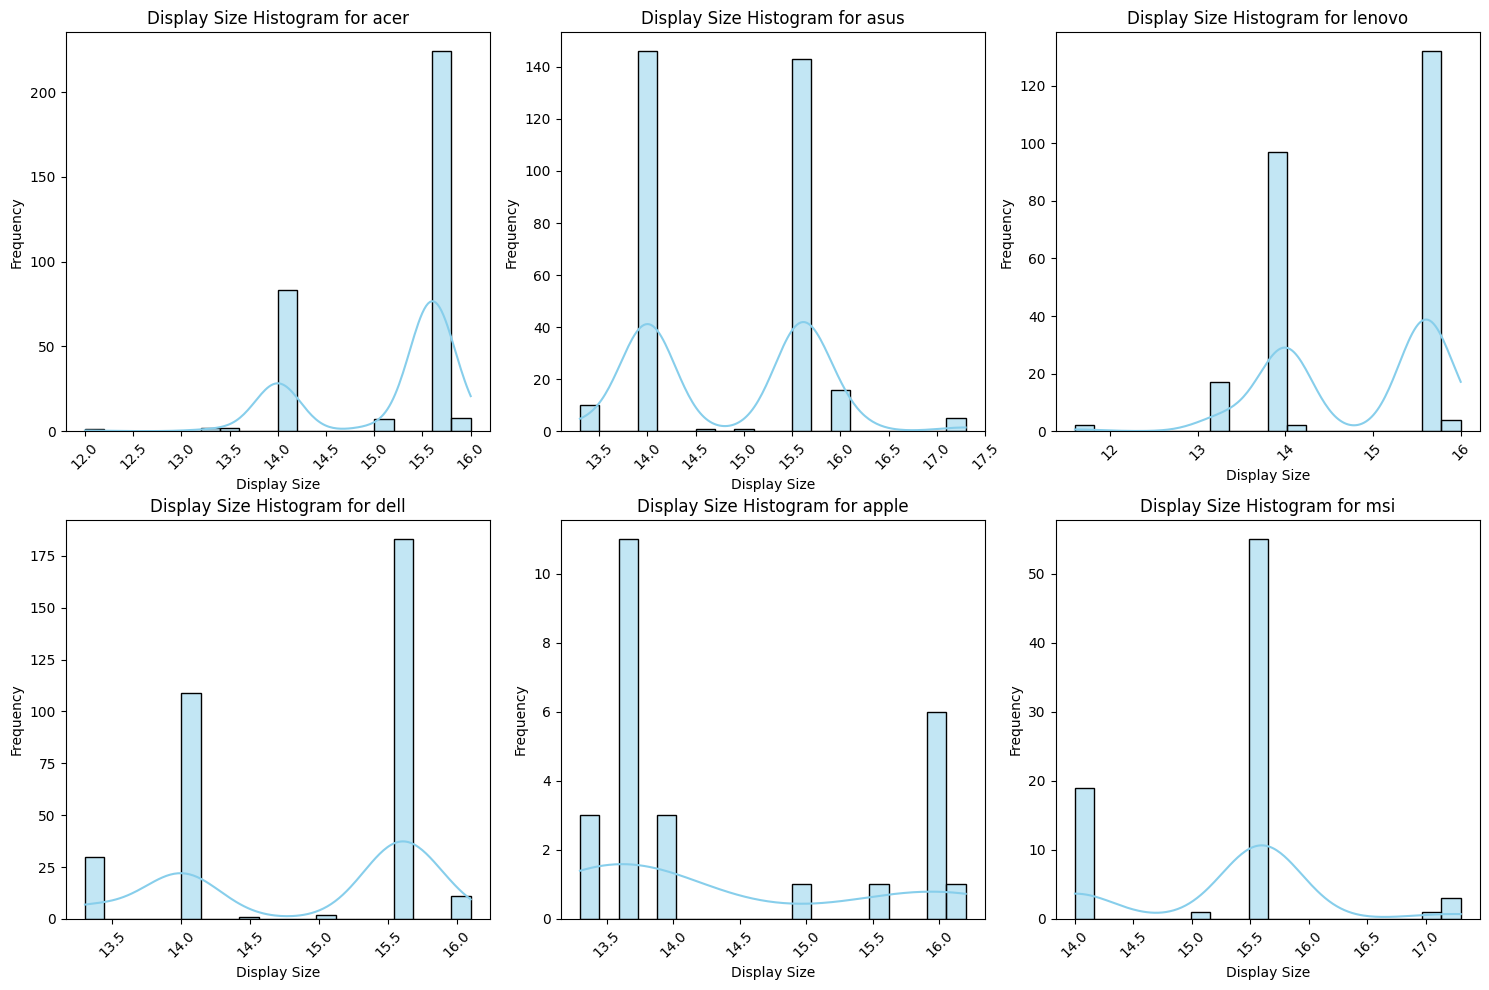

In [84]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']


num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='display size', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Display Size Histogram for {brand}')
    axes[i].set_xlabel('Display Size')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2. What can we afford for every budget range?

In [71]:
# Define the price ranges
price_bins = [25000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 555555]
price_labels = ['25k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-555k']

# Create a new column for the price categories
laptop['price_range'] = pd.cut(laptop['price'], bins=price_bins, labels=price_labels, right=False)

# Print the number of rows for each price range category
for label in price_labels:
    count = laptop[laptop['price_range'] == label].shape[0]
    print(f'Number of rows for price range {label}: {count}')

Number of rows for price range 25k-100k: 752
Number of rows for price range 100k-150k: 418
Number of rows for price range 150k-200k: 185
Number of rows for price range 200k-250k: 105
Number of rows for price range 250k-300k: 52
Number of rows for price range 300k-350k: 19
Number of rows for price range 350k-400k: 24
Number of rows for price range 400k-450k: 3
Number of rows for price range 450k-500k: 3
Number of rows for price range 500k-555k: 2


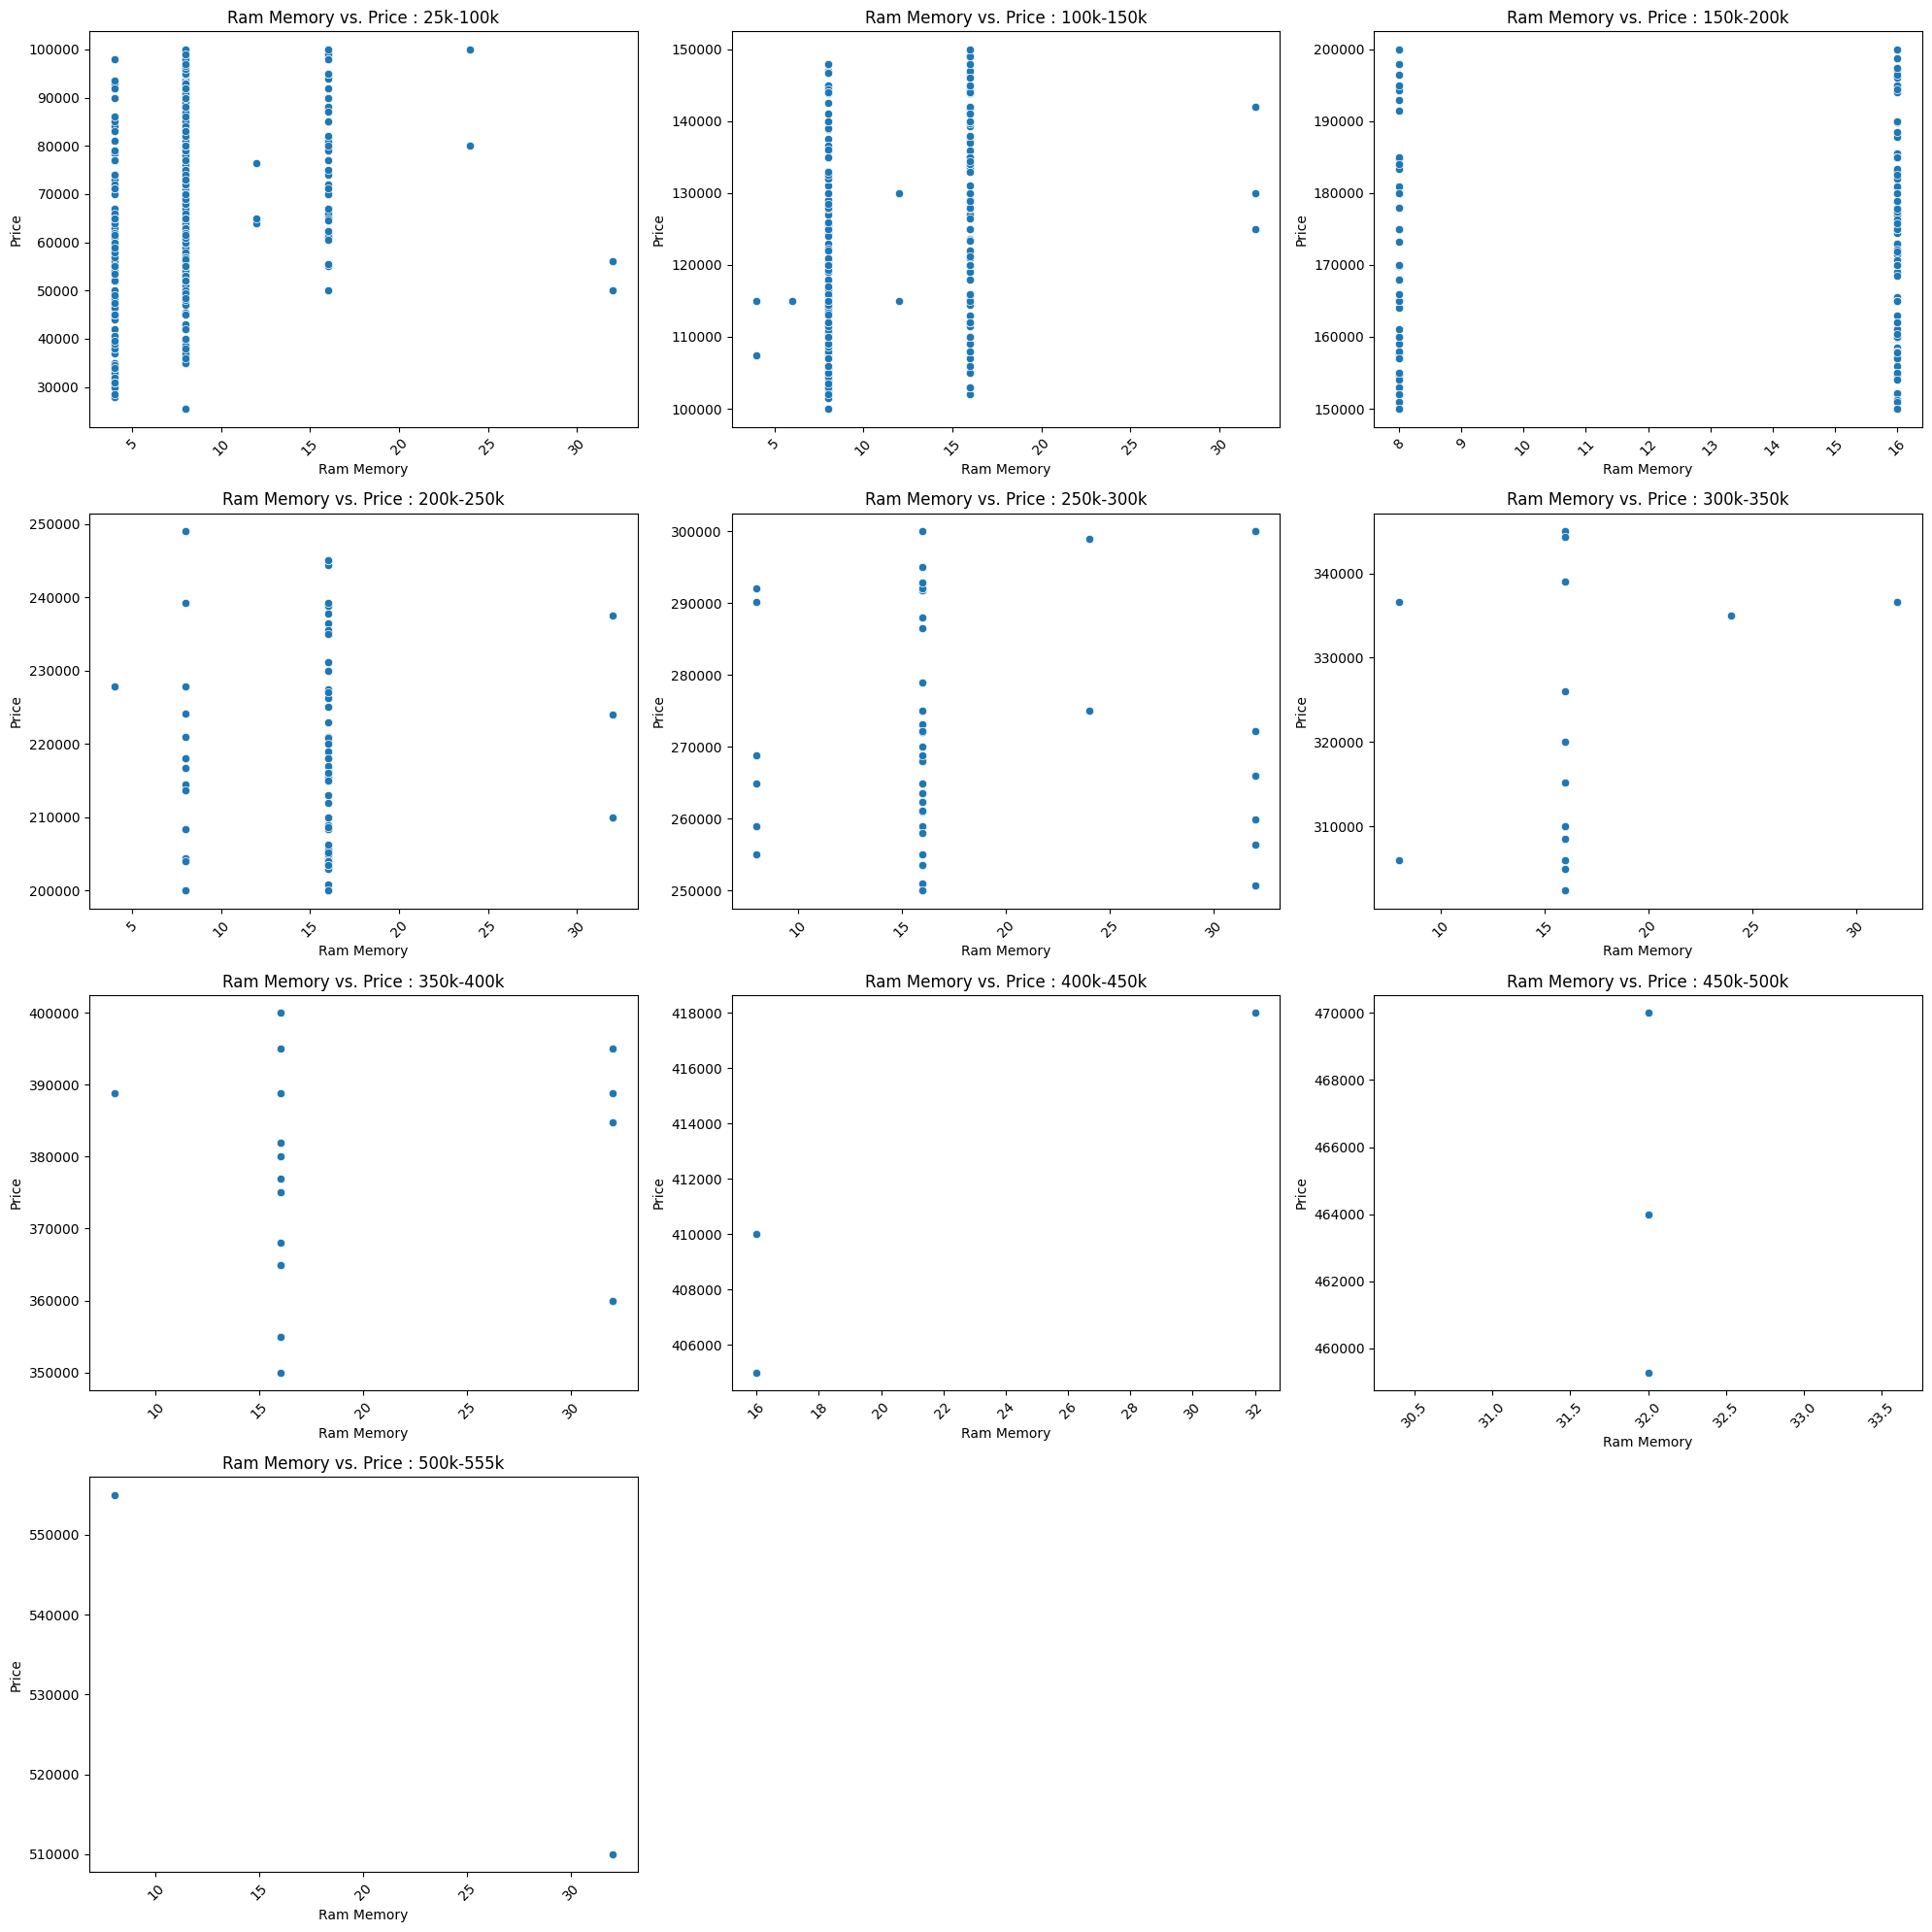

In [72]:
# Number of price categories
num_price_ranges = len(price_labels)

# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='ram memory', y='price', ax=axes[i])
        axes[i].set_title(f'Ram Memory vs. Price : {label}')
        axes[i].set_xlabel('Ram Memory')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.stripplot(data=subset, x='processor', y='price', ax=axes[i], hue='processor', palette='deep')
        axes[i].set_title(f'Processor vs. Price for Price Range: {label}')
        axes[i].set_xlabel('Processor')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='storage capacity', y='price', ax=axes[i])
        axes[i].set_title(f'Storage Capacity vs. Price Range: {label}')
        axes[i].set_xlabel('Storage Capacity')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='cpu cores', y='price', ax=axes[i])
        axes[i].set_title(f'CPU Cores vs. Price Range: {label}')
        axes[i].set_xlabel('Cpu Cores')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='display size', y='price', ax=axes[i])
        axes[i].set_title(f'Display Size vs. Price Range: {label}')
        axes[i].set_xlabel('Display Size')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


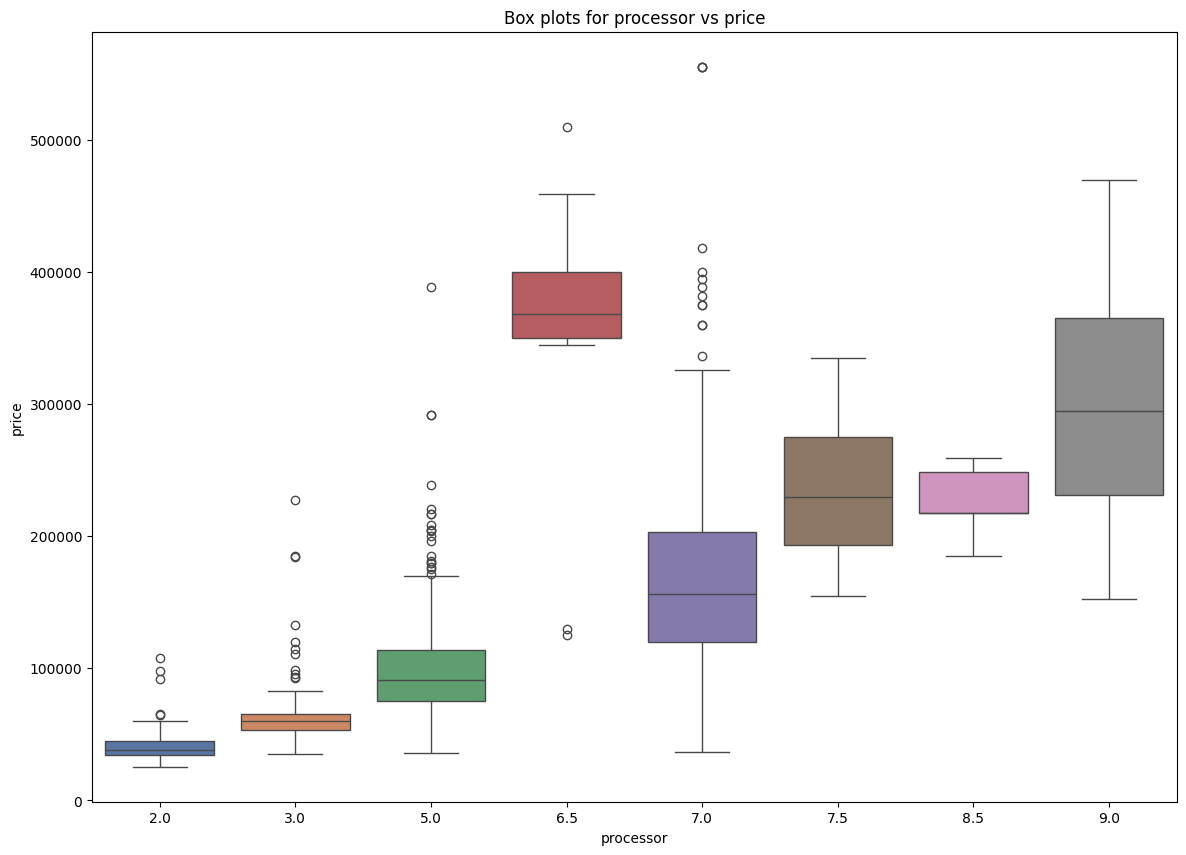

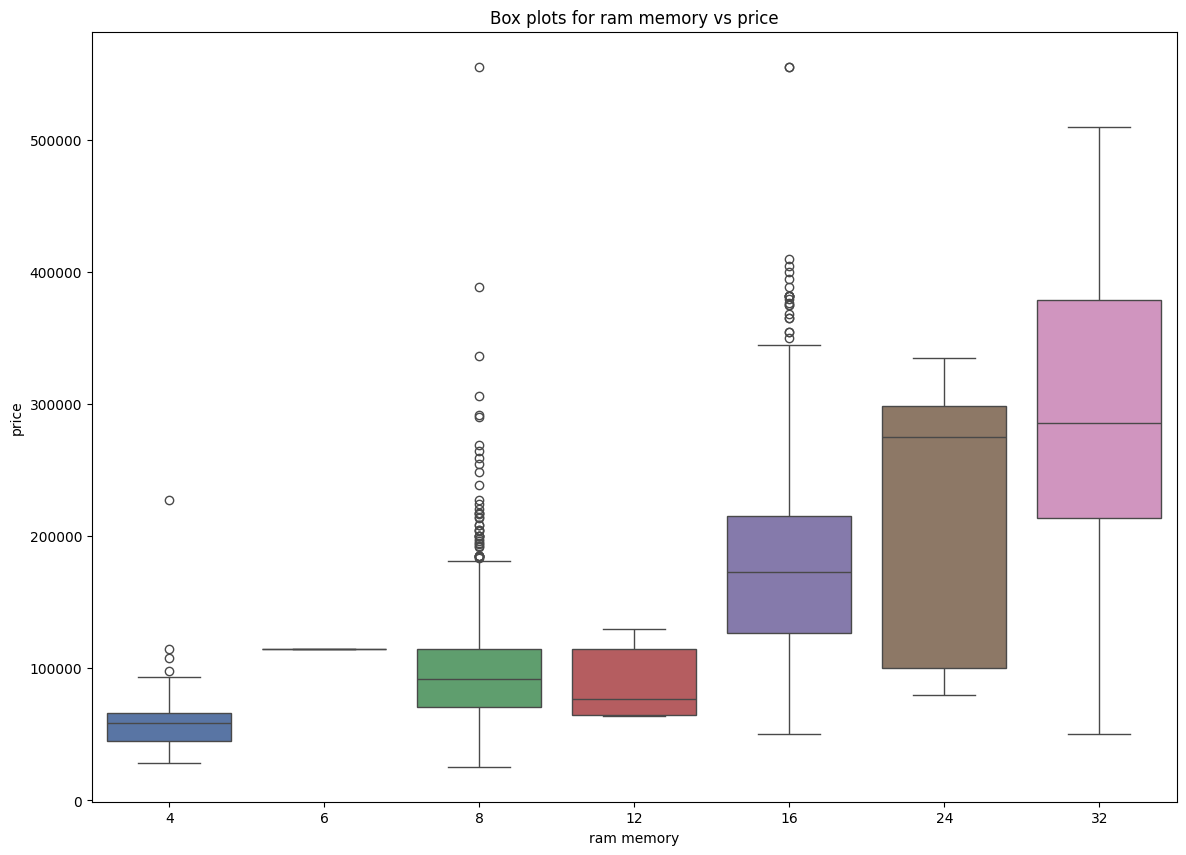

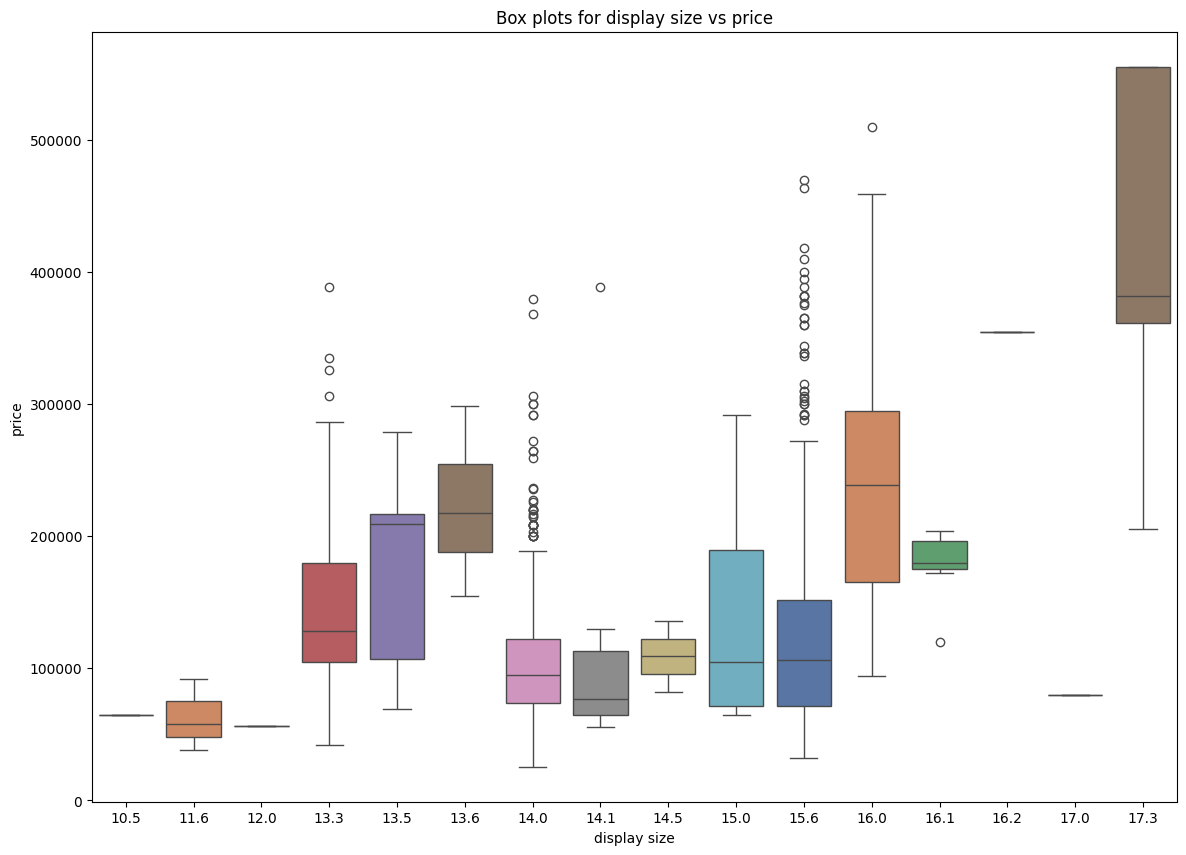

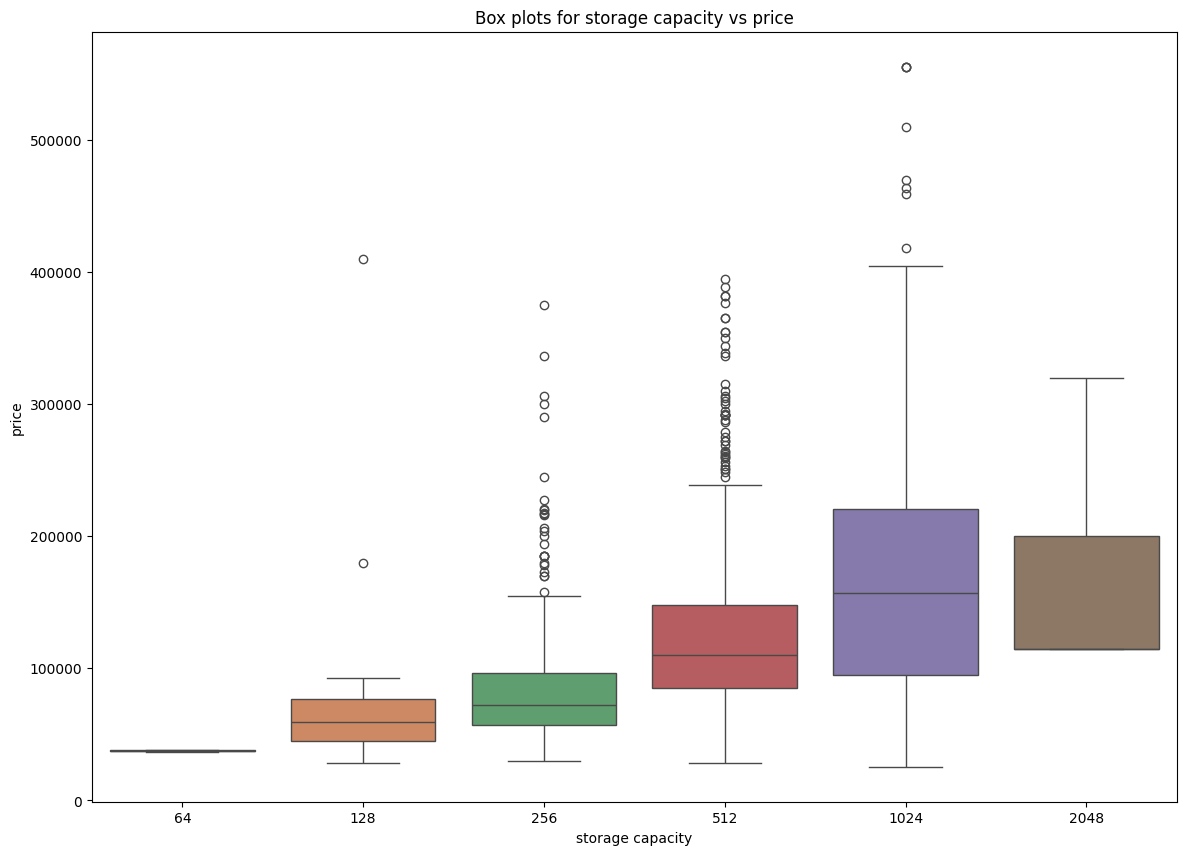

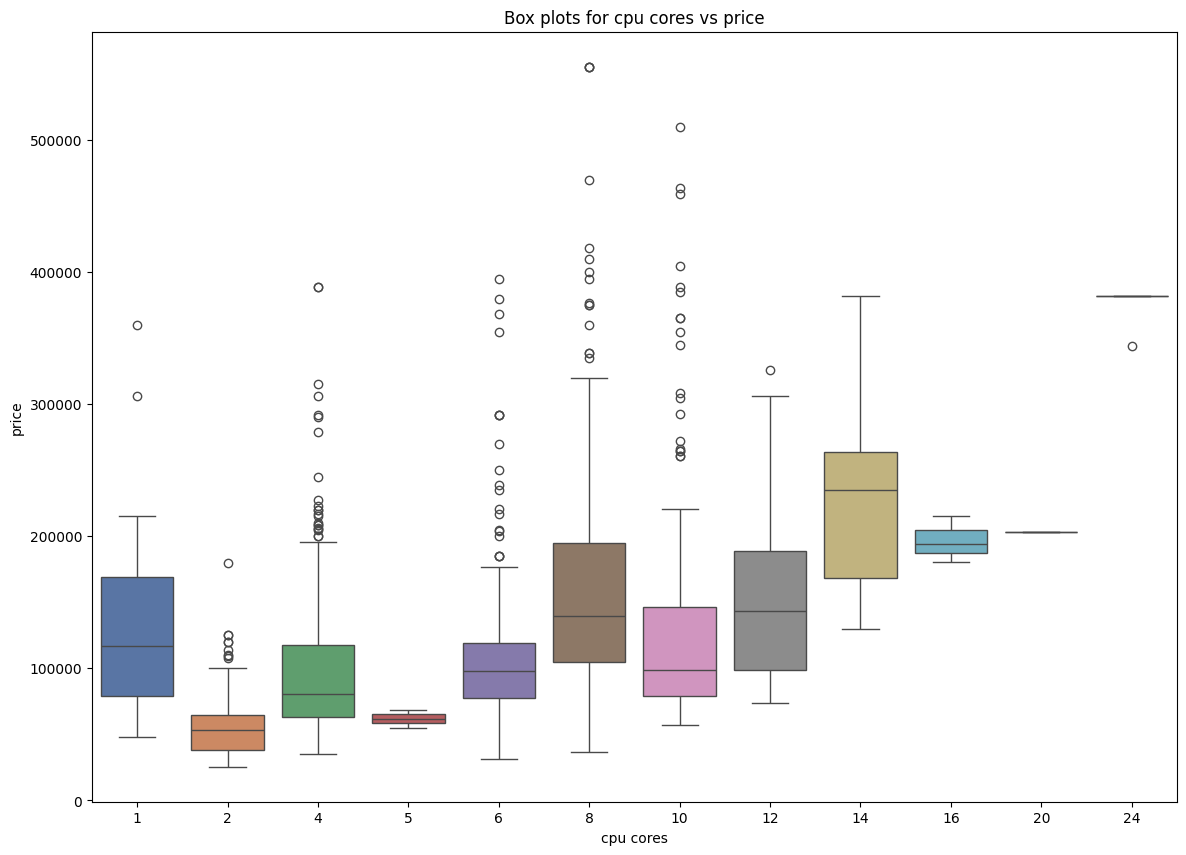

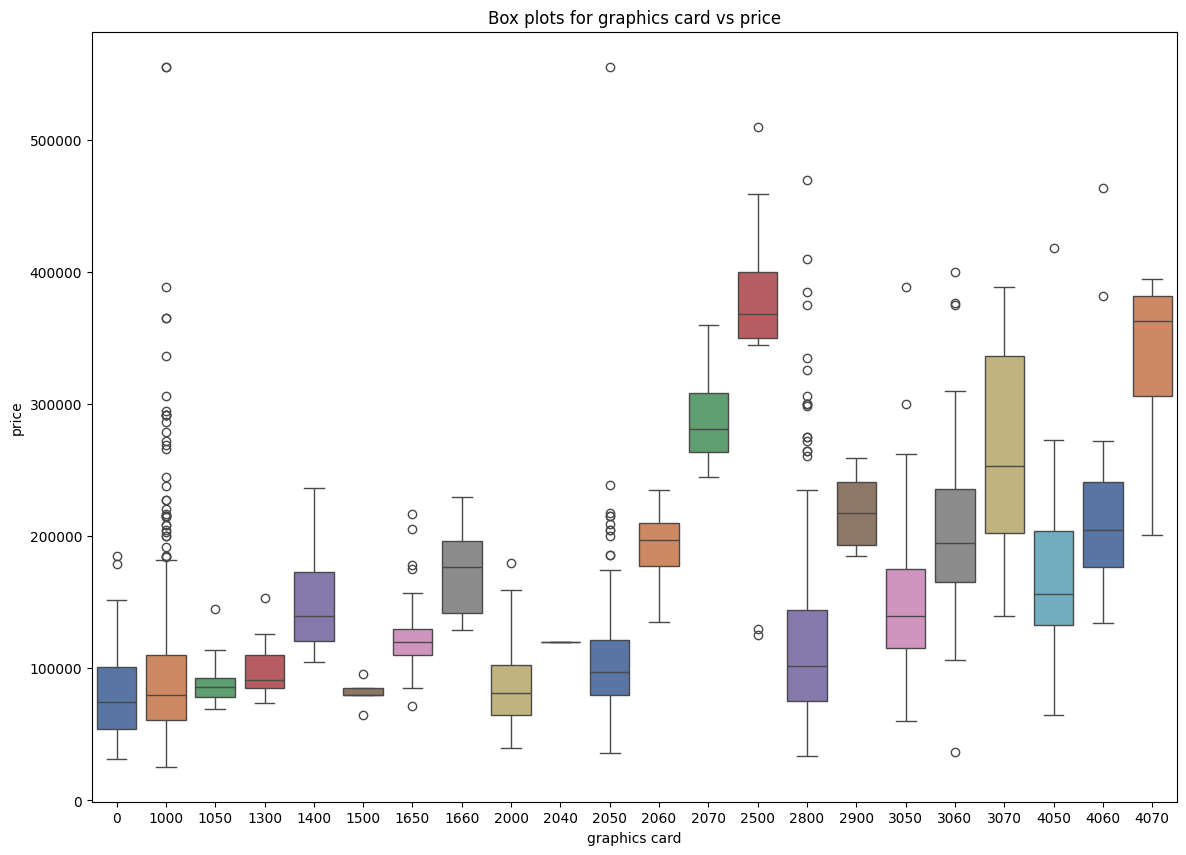

In [73]:
for col in cols_to_plot:
    plt.figure(figsize=(14,10))
    sns.boxplot(data=laptop, x=col , y='price', hue=col, palette='deep')
    plt.legend([], [], frameon=False)
    plt.title(f'Box plots for {col} vs price')
    plt.show()

### 3. What Attribute has the most affect in price?

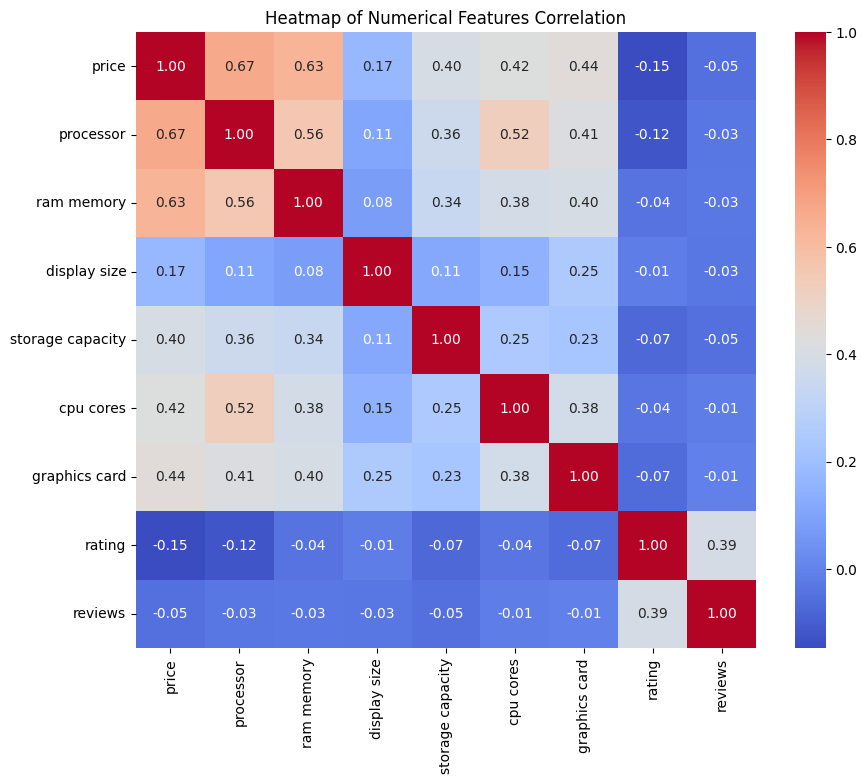

In [86]:
# Heatmap
# Create a DataFrame with only the numerical columns
COLS = ['price', 'processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card', 'rating', 'reviews']
numerical_data = laptop[COLS]
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

### 4. After what price range should you ask yourself maybe a laptop is not enough for me?


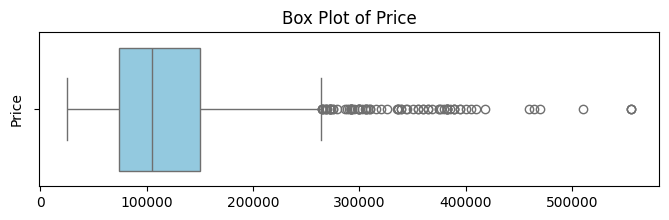

Column: price
price
85000     23
120000    22
105000    20
125000    17
110000    16
          ..
214999     1
68500      1
139318     1
53999      1
96990      1
Name: count, Length: 656, dtype: int64



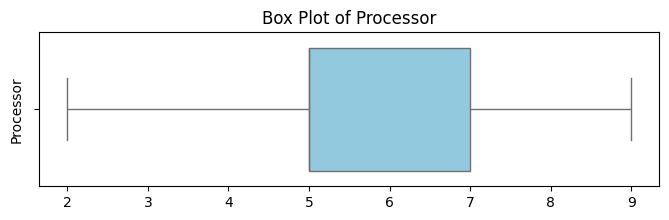

Column: processor
processor
5.0    748
7.0    518
3.0    166
2.0     64
9.0     43
6.5     11
7.5     10
8.5      5
Name: count, dtype: int64



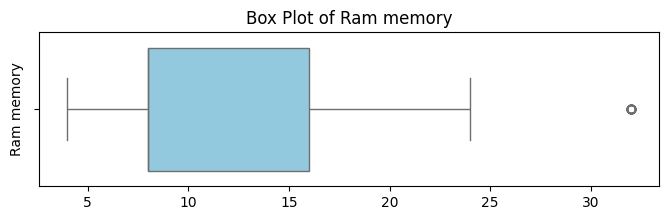

Column: ram memory
ram memory
8     925
16    461
4     138
32     30
12      5
24      5
6       1
Name: count, dtype: int64



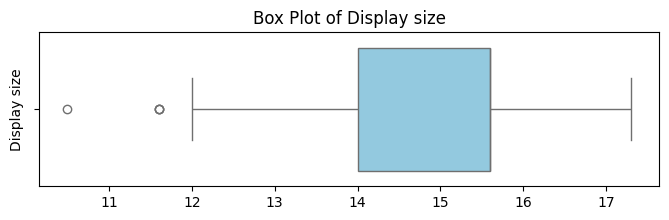

Column: display size
display size
15.6    838
14.0    534
13.3     77
16.0     45
15.0     19
13.6     11
14.1     11
17.3      8
16.1      8
13.5      5
11.6      3
14.5      2
16.2      1
10.5      1
12.0      1
17.0      1
Name: count, dtype: int64



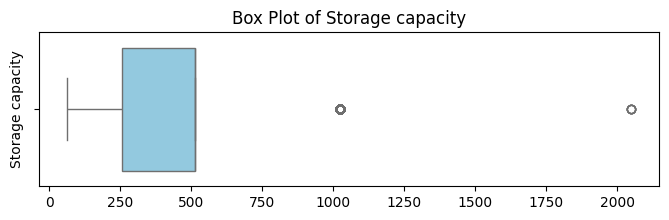

Column: storage capacity
storage capacity
512     872
256     380
1024    281
128      25
2048      5
64        2
Name: count, dtype: int64



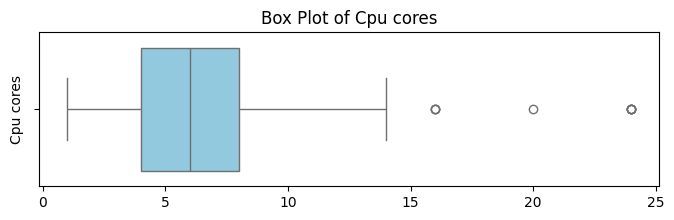

Column: cpu cores
cpu cores
8     438
6     371
4     362
10    167
2     114
12     40
14     35
1      27
24      5
16      3
5       2
20      1
Name: count, dtype: int64



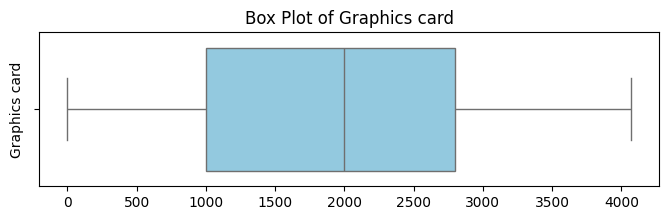

Column: graphics card
graphics card
1000    564
2800    237
3050    135
2000    135
2050    132
3060     69
4050     48
1650     45
0        44
4060     35
3070     22
1300     18
1050     16
1660     12
2500     11
4070     10
2070      8
2900      6
1400      6
2060      6
1500      5
2040      1
Name: count, dtype: int64



In [76]:
# Loop through each column and create a box plot
for col in cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(data=laptop, x=col, color='skyblue')
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.xlabel('')  # No need for x label as it's a single variable plot
    plt.ylabel(col.capitalize())
    plt.show()
    print("Column:", col)
    print(laptop[col].value_counts())
    print()
